# 实验3：K均值聚类

----------
## 介绍

在本实验中，将实现K均值聚类算法(K-means)并了解其在数据聚类上的工作原理及图像压缩上的应用。

本次实验需要用到的数据集包括：

- ex3data1.mat -2D 数据集
- hzau.jpeg -用于测试k均值聚类算法图像压缩性能的图像

评分标准如下：

- [要点1：寻找最近类中心点](#1)-----------------（20分）
- [要点2：计算均值类中心](#2)--------------------（20分）
- [要点3：随机初始化类中心](#3)-----------------（10分）
- [要点4：K均值聚类算法](#4)---------------------（20分）
- [要点5：图像压缩](#5)-----------------------------（30分）

In [1]:
# 引入所需要的库文件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
from scipy.io import loadmat

%matplotlib inline

## 1 K均值聚类 K-means Clustering

在本部分实验中，将实现K均值聚类算法。

在每次迭代中，算法主要包含两个部分：寻找最近类中心点和计算均值类中心。   

另外，基于初始化的需求，需创建一个选择随机样本并将其用作初始聚类中心的函数。

<a id="section1"></a>
### 1.1 寻找最近类中心点 

在本部分实验中，我们将为每个样本点寻找离其距离最近的类中心，并将其赋予对应的类。

具体的更新公式如下：

$$c_i:= \mathop{{\rm arg}\min}_{j=1,\cdots,K} \|\mathbf{x}_i-\mu_j\|_2 , $$

其中$\mathbf{x}_i$为第$i$个样本点，$\mu_j$为第$j$个均值类中心。
<a id="findClosestCentroids"></a>

<div class="alert alert-block alert-warning">

**要点 1：**

在下方cell中，请**实现''寻找最近类中心点''的代码**。

</div>

In [17]:
# ====================== 在这里填入代码 =======================
def find_closest_centroids(X, centroids):
    """   
    输入
    ----------
    X : 尺寸为 (m, n)的矩阵，第i行为第i个样本，n为样本的维数。 
        
    centroids : 尺寸为 (k, n)的矩阵，其中k为类别个数。
    
    输出
    -------
    idx : 尺寸为 (m, 1)的矩阵，第i个分量表示第i个样本的类别。 
    """
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 0x3f3f3f3f
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2) 
            if dist < min_dist:
                min_dist = dist
                idx[i] = j

    return idx
# ============================================================= 

如果完成了上述函数 `find_closest_centroids`，以下代码可用于测试。如果结果为`[0 2 1]`，则计算通过。

In [18]:
#导入数据
data = loadmat('ex3data1.mat')
X = data['X']
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = find_closest_centroids(X, initial_centroids)
idx[0:3]

array([0., 2., 1.])

In [19]:
#显示并查看部分数据
data2 = pd.DataFrame(data.get('X'), columns=['X1', 'X2'])
data2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


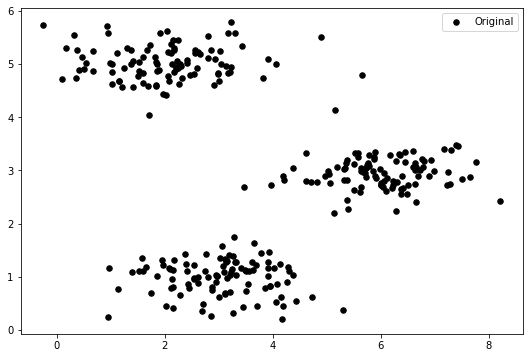

In [20]:
#可视化二维数据
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(X[:,0], X[:,1], s=30, color='k', label='Original')
ax.legend()
plt.show()

<a id="section2"></a>
## 1.2 计算均值类中心  

在本部分实验中，我们将每类样本的均值作为新的类中心。

具体的更新公式如下： 

$$ \mu_j := \frac{1}{\left| C_j\right|} \sum_{i \in C_j} \mathbf{x}_i
$$

其中$C_j$为第$j$类样本点的指标集，$\left| C_j\right|$为集合$C_j$的元素个数。
<a id="computeCentroids"></a>


<div class="alert alert-block alert-warning">

**要点 2：**

在下方cell中，请**实现''计算均值类中心''的代码**。

</div>

In [46]:
# ====================== 在这里填入代码 ======================= 
def compute_centroids(X, idx, k):
    """   
    X : 尺寸为 (m, n)的矩阵，第i行为第i个样本，n为样本的维数。 
    
    idx : 尺寸为 (m, 1)的矩阵，第i个分量表示第i个样本的类别。 
    """
    m = X.shape[0]
    n = X.shape[1]
    centroids = np.zeros((k, n))
    
    for i in range(k):
        index = np.where(idx == i)
        centroids[i,:] = (np.sum(X[index,:], axis=1) / len(index[0])).ravel()
    return centroids
    
# ============================================================= 

In [47]:
#测试上述计算均值类中心代码
compute_centroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

## 1.3 随机初始化类中心

随机选择k个样本作为初始类中心。

<div class="alert alert-block alert-warning">

**要点 3：**

在下方cell中，请**实现''随机初始化类中心''的代码**。具体为随机选择k个样本作为初始类中心。

</div>


In [48]:
# ====================== 在这里填入代码 ======================= 
def init_centroids(X, k):
    m = X.shape[0]
    n = X.shape[1]
    centroids = np.zeros((k, n))
    index = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[index[i],:]
    return centroids
# ============================================================= 

In [49]:
#测试上述随机初始化类中心代码
init_centroids(X, 3)


array([[4.37271861, 1.02914092],
       [6.64078939, 2.41068839],
       [5.72395697, 3.04454219]])

## 1.4 实现K均值聚类算法

<div class="alert alert-block alert-warning">

**要点 4：**

在下方cell中，请通过结合上述步骤**实现''K均值聚类算法''的代码**。

</div>

In [50]:
# ====================== 在这里填入代码 =======================
def run_k_means(X, initial_centroids, max_iters):
    m = X.shape[0]
    n = X.shape[1]
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    return idx, centroids
# ============================================================= 

## 2 将K均值聚类算法应用于数据集1

在本部分实验中，将已实现的K均值聚类算法应用于数据集1，该数据集中的样本维数为2，因此聚类结束后，可通过可视化观察聚类结果。

In [51]:
idx, centroids = run_k_means(X, initial_centroids, 10)

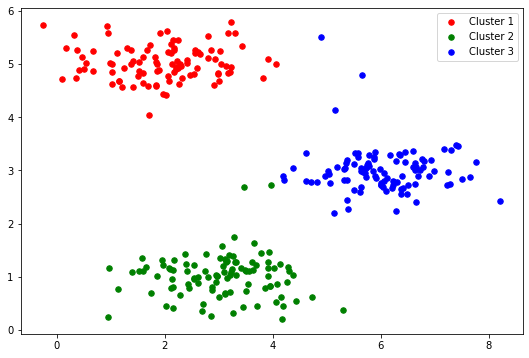

In [52]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()
plt.show()

### 1.3 将K均值聚类算法应用于图像压缩 Image compression with K-means


In [53]:
#读取图像
A = mpl.image.imread('hzau.jpeg')
A.shape

(96, 150, 3)

现在我们需要对数据应用一些预处理，并将其提供给K-means算法。

In [54]:
# 归一化图像像素值的范围到[0, 1] 
A = A / 255.

# 对原始图像尺寸作变换
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(14400, 3)

<div class="alert alert-block alert-warning">

**要点 5：**

在下方cell中，**请利用K均值聚类算法实现图像压缩**。具体方法是将原始像素替换为对应的均值类中心像素。

</div>

In [55]:
# ====================== 在这里填入代码 =======================
# 随机初始化类中心  
initial_centroids = init_centroids(X, 16)

idx, centroids = run_k_means(X, initial_centroids, 10)
idx = find_closest_centroids(X, centroids)
A_compressed = centroids[idx.astype(int),:]
A_compressed = np.reshape(A_compressed, (A.shape[0], A.shape[1], A.shape[2]))


print(A_compressed.shape)
# ============================================================= 

(96, 150, 3)


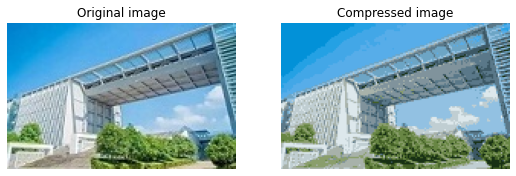

In [56]:
#显示压缩前后的图像
fig, ax = plt.subplots(1, 2, figsize=(9,6))
ax[0].imshow(A)
ax[0].set_axis_off()
ax[0].set_title('Original image')
ax[1].imshow(A_compressed)
ax[1].set_axis_off()
ax[1].set_title('Compressed image')
plt.show()